In [10]:
import pandas as pd
import numpy as np
import sys
df = pd.DataFrame(np.random.randn(10,3))
df = df.applymap(lambda x: round(x*10,0))

#np.random.randn(10,3)

df.iloc[3:5,0] = np.nan
df.iloc[4:6,1] = np.nan
df.iloc[5:8,2] = np.nan
df.info()
sys.getsizeof(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
0    8 non-null float64
1    8 non-null float64
2    7 non-null float64
dtypes: float64(3)
memory usage: 320.0 bytes


344

In [6]:
from sklearn.decomposition import PCA


file_name = r'..\check_8_c\train.csv'
df = pd.read_csv(file_name, nrows=100, low_memory=False )
df_X = df.drop('target', axis=1)
number_columns = [
    col_name
    for col_name in df_X.columns
    if col_name.startswith('number')
]
df_X = df_X[number_columns]
df_X.fillna(-1, inplace=True)

pca = PCA()
pca
#pca.fit_transform(df_X)
#expl_var[ expl_var > max()]

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [56]:
expl_var_ratio = pca.explained_variance_ratio_
i = 0
sum_ratio = 0
for x in expl_var_ratio:
    sum_ratio +=x
    i += 1
    if sum_ratio >.99:
        break
print(i)
np.sum(expl_var_ratio[:i])
len(pca.components_[0])
#expl_var = pca.explained_variance_
#max_expl_var = max(expl_var)
#expl_var[ expl_var > max_expl_var * 0.01]

24


753

In [17]:
from xgboost import XGBRegressor
model = XGBRegressor()
a = {'a':1, 'b':2}

import os
d = pd.DataFrame([a])
header = not os.path.isfile('metrics.csv')
d.to_csv('metrics.csv', mode='a', index=False,header=header )


"""
from sklearn.linear_model import LogisticRegression
r = LogisticRegression()
r.predict()
"""

'\nfrom sklearn.linear_model import LogisticRegression\nr = LogisticRegression()\nr.predict()\n'

In [151]:
import os
file_name = r'C:\ds\sdsj\check_8_c\train.csv'
file_size = os.path.getsize(file_name)

"""
df = pd.read_csv(file_name, nrows=100 )
df.to_csv('test_row_size.csv', header=False)
row_size = os.path.getsize('test_row_size.csv')
print('rows estimation', file_size/row_size)

usecols=['number_0','wefwefwewe']
usecols = df.columns & usecols
print(usecols)
"""

#df = pd.read_csv(file_name, usecols=usecols, nrows=1000 )
df = pd.read_csv(file_name, nrows=1000 )
#corr = df[ :df.shape[1] ].corr()
#df_corr = pd.DataFrame( corr )

#corr_cols = set()
#for i in range(df_corr.shape[0]):
#    row = df_corr.iloc[i]    
#    print(row[row>0.95])

    #cols = row.filter(lambda x: abs(x) > 0.95)
#        if abs(v) > hyper_params_corr_limit and i != j:
#            corr_cols[corr.columns[j]] = True            

print(corr_cols)

#df = pd.read_csv(r'C:\ds\sdsj\check_8_c\train.csv', nrows=10 )
#df.shape
#round(1234,-2)

FileNotFoundError: [WinError 3] Системе не удается найти указанный путь: 'C:\\ds\\sdsj\\check_8_c\\train.csv'

In [56]:
df.mean()

0    0.833333
1    1.222222
2   -2.941176
dtype: float64

In [71]:
#df.apply(lambda x: x.fillna(x.mean()), axis=0)
#df.fillna

df_X = df.copy()
df_X[2].value_counts().index[0]

#df_X[1].fillna( df_X[1].max(), inplace=True)
#df_X

 9.0     3
-11.0    2
-9.0     1
 5.0     1
-19.0    1
 19.0    1
-7.0     1
 1.0     1
-0.0     1
-27.0    1
-13.0    1
-16.0    1
-2.0     1
 13.0    1
Name: 2, dtype: int64

In [15]:
#train
argv = ['--train-csv', r'..\check_1_r\train.csv',
       '--model-dir', r'.',
       '--mode', 'regression']
print(' '.join(argv) )

--train-csv ..\check_1_r\train.csv --model-dir . --mode regression


In [73]:
#predict
argv = ['--test-csv', r'..\check_1_r\test.csv',
        '--prediction-csv', r'..\check_1_r\prediction.csv', 
       '--model-dir', r'.']
print(' '.join(argv) )

--test-csv ..\check_1_r\test.csv --prediction-csv ..\check_1_r\prediction.csv --model-dir .


In [74]:
#score
argv = ['--test-target-csv', r'..\check_1_r\test-target.csv',
       '--prediction-csv', r'..\check_1_r\h2o_prediction.csv']
print(' '.join(argv) )

--test-target-csv ..\check_1_r\test-target.csv --prediction-csv ..\check_1_r\h2o_prediction.csv


In [280]:
%%time
import pandas as pd
import sys
import os
#from tpot import TPOTClassifier, TPOTRegressor
#tpotr = TPOTRegressor()
df = pd.read_csv(r'..\check_8_c\train.csv', nrows=None, low_memory=False)

Wall time: 38.1 s


In [281]:
%%time
#if any(df.isnull()):    
#   df.fillna(-1, inplace=True)

print(df.isnull().values.any())
df.fillna(-1, inplace=True)
print(df.isnull().values.any())

True
False
Wall time: 4.04 s


In [43]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143525 entries, 0 to 143524
Columns: 878 entries, number_0 to line_id
dtypes: float64(753), int64(2), object(123)
memory usage: 1.6 GB


In [282]:
%%time

def transform_ds(df):
    int_cols = []
    float_cols = []
    category_cols = []
    other_cols = []
    
    df_onehot = pd.DataFrame()

    for col_name in df.columns:
        
        n_uniq = df[col_name].nunique()
        if n_uniq == 1: # skip constant columns            
            continue
            
        col_type = df.dtypes[col_name]
        if col_type in ['int','int64']:
            int_cols.append(col_name)
        elif col_type in ['float', 'float64']:
            float_cols.append(col_name)
        elif col_type == 'object':
            uniq_values = df[col_name].unique()
            total = len( df[col_name] )
            if 2 < n_uniq <= 20:
                for uniq in uniq_values:
                    df_onehot['onehot_{}={}'.format(col_name,uniq)] = (df[col_name] == uniq).astype(int)
            elif n_uniq / total < 0.5: 
                category_cols.append(col_name)
            else:
                other_cols.append(col_name)
        else:
            other_cols.append(col_name)

    df_opt = df_onehot.apply(pd.to_numeric, downcast='integer')
    
    if len(int_cols) > 0:
        df_opt[int_cols] =  df[int_cols].apply(pd.to_numeric, downcast='integer')
    
    if len(float_cols) > 0:
        df_opt[float_cols] = df[float_cols].apply(pd.to_numeric, downcast='float')
        
    if len(category_cols) > 0:
        df_opt[category_cols] = df[category_cols].astype('category')    
        
    if len(other_cols) > 0:
        df_opt[other_cols] = df[other_cols]

    return df_opt

df_opt = transform_ds(df)
df_opt.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143525 entries, 0 to 143524
Columns: 1015 entries, onehot_string_0=МВС to datetime_90
dtypes: category(99), float32(753), int32(1), int8(162)
memory usage: 471.3 MB
Wall time: 16 s


In [ ]:
df_opt.dtypes.value_counts()

In [210]:
%%time

from sklearn.feature_selection import VarianceThreshold # mutual_info_regression
fs = VarianceThreshold(0.001)
df_nums = df_opt.select_dtypes(include=['float32','int8']) 
fs.fit(df_nums) # fit_transform(df)

supported = fs.get_support()
print('rows to remove:', len(supported[supported==False]))
#print( df_opt['number_6'].value_counts() )
for i in range(len(supported)):
    if not supported[i]:
        print(df_opt.columns[i])


rows to remove: 29
onehot_string_12=-1
onehot_string_13=-1
onehot_string_13=CR
onehot_string_13=SC
onehot_string_13=MA
onehot_string_13=CC
onehot_datetime_71=2016-08-11
onehot_datetime_71=2016-07-13
onehot_datetime_71=2015-04-08
onehot_datetime_71=2015-04-03
onehot_datetime_71=2016-06-02
onehot_string_22=PREMIER
onehot_string_22=VIP
onehot_string_23=PREMIER
onehot_string_23=VIP
onehot_string_24=PREMIER
onehot_string_24=VIP
onehot_string_29=-1
onehot_string_30=Блокирующий, не террорист
number_1
number_6
number_7
number_9
number_10
number_27
number_29
number_177
number_183
number_352
Wall time: 2.71 s


In [294]:
%%time
from sklearn.feature_selection import mutual_info_regression
df_X =df_nums.drop('target',axis=1)
df_y = df.target
mir = mutual_info_regression(df_X[:1000], df_y[:1000])

Wall time: 17.1 s


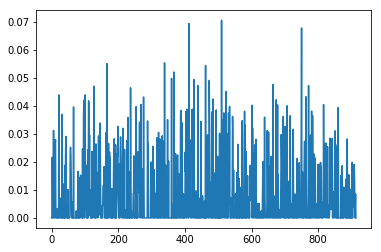

In [295]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(mir)
#print(len(mir[mir>0.02]))

In [300]:
print(df_X.columns[mir>np.mean(mir) + 4*np.std(mir)])

Index(['number_251', 'number_349', 'number_589'], dtype='object')


In [46]:
constant_columns = [
        col_name
         for col_name in df_opt.columns
         if df_opt[col_name].nunique() == 1
        ]
constant_columns

[]

In [81]:
print(df_opt.isnull().values.any())

#df.fillna(-1, inplace=True)
#print(df.isnull().values.any())

False


In [15]:
# %%time
import datetime


empty_date = datetime.datetime.strptime('0001-01-01', '%Y-%m-%d')


def parse_dt(x):
    if not isinstance(x, str):
        return empty_date
    elif len(x) == len('2010-01-01'):
        return datetime.datetime.strptime(x, '%Y-%m-%d')
    elif len(x) == len('2010-01-01 10:10:10'):
        return datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
    else:
        return empty_date
    

def transform_datetime_features(df):
    datetime_columns = [
        col_name
        for col_name in df.columns
        if col_name.startswith('datetime')
    ]

    df_date = pd.DataFrame() #(dtypes=[['datetime','uint8','uint8','uint8','uint16']])
    for col_name in datetime_columns:
        #df_date[col_name],
        #df_date['number_weekday_{}'.format(col_name)],
        #df_date['number_month_{}'.format(col_name)],
        #df_date['number_day_{}'.format(col_name)],
        #df_date['number_hour_{}'.format(col_name)],
        #df_date['number_hour_of_week_{}'.format(col_name)],
        #df_date['number_minute_of_day_{}'.format(col_name)] = 
        df[col_name].apply(lambda x: parse_dt(x)[0] )
        
        #df_date[col_name] = a[0]
        #df_date['number_weekday_{}'.format(col_name)] = df_date[col_name].apply(lambda x: x.weekday())
        #df_date['number_month_{}'.format(col_name)] = df_date[col_name].apply(lambda x: x.month)
        #df_date['number_day_{}'.format(col_name)] = df_date[col_name].apply(lambda x: x.day)
        #f_date['number_hour_{}'.format(col_name)] = df_date[col_name].apply(lambda x: x.hour)
        #df_date['number_hour_of_week_{}'.format(col_name)] = df_date[col_name].apply(lambda x: x.hour + x.weekday() * 24)
        #df_date['number_minute_of_day_{}'.format(col_name)] = df_date[col_name].apply(lambda x: x.minute + x.hour * 60)        
        
    return transform_ds(df_date)

"""
apply(lambda x: parse_dt(x)) (FAST):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143525 entries, 0 to 143524
Columns: 427 entries, number_weekday_datetime_0 to datetime_90
dtypes: datetime64[ns](90), float32(337)
memory usage: 283.1 MB
Wall time: 6min 16s

pd.to_datetime (SLOW):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143525 entries, 0 to 143524
Columns: 630 entries, number_weekday_datetime_0 to datetime_90
dtypes: datetime64[ns](90), int16(174), int8(366)
memory usage: 196.3 MB
Wall time: 8min 34s
"""

#df_dates = transform_datetime_features(df_opt)
#df_dates.info(memory_usage='deep')
str(datetime.MINYEAR).rjust(4,'0')
str(20183).rjust(4,'0')

'20183'

In [375]:
#df_opt['datetime_3']
#d = pd.DataFrame(dtype=[['datetime','uint8','uint8','uint8','uint8','uint8','uint16']])
#type(df_opt['datetime_0'])
#pd.Series((None,None,None,None,None,None,None))
pd.__version__

'0.23.0'

In [14]:
df_opt[df_dates.columns] = df_dates
df_opt.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 1345 entries, onehot_string_0=МВС to number_day_datetime_66
dtypes: category(121), float32(740), int16(83), int32(1), int8(400)
memory usage: 182.1 MB
Wall time: 30.9 s


In [9]:
opt_dates = transform_ds(pd.DataFrame())
#df_dates.info(memory_usage='deep')
#df_dates.head()

In [37]:
df_opt.info(memory_usage='deep')
df_opt.head()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Empty DataFrame

""


In [ ]:
%%time
df_int = df.select_dtypes(include=['int','int64'])
df_opt = df_int.apply(pd.to_numeric, downcast='unsigned')
print(df_opt.shape)
print(df_int)

In [50]:
df_float = df.select_dtypes(include=['float'])
df_opt = pd.concat( [df_opt, df_float.apply(pd.to_numeric, downcast='float')], axis=1)
print(df_opt.shape)

Wall time: 558 ms


In [ ]:
for col in df.columns:
    print(df.dtypes[col])

In [10]:
def estimate_rows( file_name ):
    nrows = 200
    test_file_name = 'test_row_count.csv'

    file_size = os.path.getsize(file_name)
    df = pd.read_csv(file_name, nrows=nrows)
    df.to_csv(test_file_name, header=False)
    row_size = os.path.getsize(test_file_name) / nrows
    rows = file_size / row_size
    size = rows * sys.getsizeof(df) / nrows
    return { 'rows': int(rows), 'row_size': int(row_size), 'total_size': int(size) }

#estimate_rows(r'..\check_1_r\train.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 878 entries, number_0 to line_id
dtypes: float64(753), int64(2), object(123)
memory usage: 111.4 MB


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.transform()

In [4]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
reg = GradientBoostingRegressor()
cls = GradientBoostingClassifier()
print( reg.get_params().keys() )
print()
print( cls.get_params().keys() )

dict_keys(['alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'presort', 'random_state', 'subsample', 'verbose', 'warm_start'])

dict_keys(['criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'presort', 'random_state', 'subsample', 'verbose', 'warm_start'])


In [8]:
from sklearn.model_selection import GridSearchCV
#?GridSearchCV
?GradientBoostingRegressor

In [ ]:
import smtplib
from email.mime.text import MIMEText

msg = MIMEText('test')
msg['Subject'] = 'subj'
msg['From'] = 'pomka@yandex.ru'
msg['To'] = 'pomka@yandex.ru'

HOST = "smtp.yandex.ru"
server = smtplib.SMTP(HOST)

username = 'pomka'
server.starttls()
server.login(username, input())
server.sendmail(msg['From'], msg['To'], msg.as_string())
server.quit()


In [146]:
data_cols = rnd_cols.copy()
data_cols.append('zero')
#from sklearn.decomposition import PCA
#pca = PCA()
#pca.fit_transform(df)
#pca.explained_variance_ratio_
from sklearn.feature_selection import VarianceThreshold # mutual_info_regression
fs = VarianceThreshold(0.001)
a2 = fs.fit_transform(df[data_cols])
print(len(fs.variances_))
print(a2.shape)
#print( df.columns )
#GOOD:
#mir = mutual_info_regression(df[rnd_cols], df['multi']) !
#print(mir)

101
(10000, 100)
Wall time: 97 ms


In [274]:
%%time
import numpy as np
import pandas as pd

rows = 10**4
cols = 100
a = np.random.randn(rows, cols)
rnd_cols = list(map( str, range(1,cols+1) ))
#print(rnd_cols)
df = pd.DataFrame(a, columns=rnd_cols)

#.corr()
df['depend'] = (df['1']+df['2']) / (df['3'] * df['4'])
df['zero'] = np.zeros(rows)
#df.corr()

Wall time: 60 ms


[1.51731528e-02 2.53584204e-02 1.91260518e-01 2.00762977e-01
 0.00000000e+00 1.64250667e-03 5.27545230e-03 6.24725045e-04
 6.96821059e-03 4.34816234e-03 3.10594215e-03 2.90278956e-03
 4.95792394e-03 1.83537265e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.48026515e-03 4.42373671e-03 0.00000000e+00
 0.00000000e+00 1.23407463e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.14097332e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 8.71566569e-06 1.07249325e-03 6.48311155e-03
 0.00000000e+00 0.00000000e+00 5.91902407e-03 0.00000000e+00
 5.29046719e-04 0.00000000e+00 0.00000000e+00 1.14319830e-02
 2.85028431e-04 0.00000000e+00 5.20290373e-04 1.25996574e-02
 5.85101942e-03 5.71968048e-03 7.18666610e-03 0.00000000e+00
 7.12298741e-03 1.11020072e-02 0.00000000e+00 9.03718597e-03
 0.00000000e+00 3.83751310e-03 0.00000000e+00 2.83126395e-03
 3.65392741e-04 0.00000000e+00 7.24151081e-03 2.42211544e-03
 0.00000000e+00 5.11261156e-03 0.00000000e+00 4.53317687e-03
 0.00000000e+00 5.980012

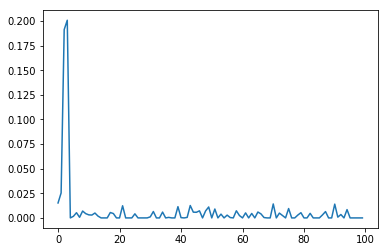

In [275]:
%%time
from sklearn.feature_selection import mutual_info_regression
mir = mutual_info_regression(df[rnd_cols], df['depend'])
print(mir)
plt.plot(mir)

In [278]:
print(df[rnd_cols].columns[mir>np.mean(mir)]) # + 1*np.std(mir)])

Index(['1', '2', '3', '4', '9', '22', '40', '44', '47', '49', '50', '52', '59',
       '71', '76', '91', '95'],
      dtype='object')


In [117]:
print(mir[mir > 0.01])

[0.43157357 0.41050478 0.01160561 0.01198137 0.01318509 0.0118979
 0.01253751 0.01172323 0.02204601 0.01072911 0.01056558]


In [419]:
%%time
df_unique = df_opt.apply(lambda x: x.nunique())



Wall time: 3.44 s


In [407]:
df_unique.sort_values('counts', inplace=True)

In [423]:
df_unique

number_12     14
number_5      20
number_6      20
number_9      20
number_13      4
number_14     13
number_19      3
number_22     15
number_23     15
number_25     11
number_29      3
number_33      9
number_37     17
number_41     10
number_45      6
number_49      3
number_53      6
number_57      9
number_61     16
number_69      7
number_73      7
number_77      6
number_81     10
number_85      9
number_89      7
number_95     11
number_106    17
number_107    16
number_109    19
number_110     9
              ..
number_666     4
number_667     7
number_668    13
number_672     4
number_673     7
number_674    13
number_681     4
number_682     7
number_683    13
number_693     8
number_694    16
number_696     4
number_697     7
number_698    13
number_699     4
number_700     4
number_701     4
number_702     4
number_703     4
number_704     5
number_705     9
number_711     4
number_712     7
number_713     8
number_726     4
number_727     7
number_728    13
number_741    

In [424]:
df_unique = df_unique[df_unique > 2]
df_unique = df_unique[df_unique <= 20]
df_unique.sort_values(inplace=True)

In [428]:
df_unique['number_597']

3

In [17]:
import numpy as np
X=[0.6,0.4,0.58,0.1,-1130]
m=['a','b','c','d','e']
#sorted_scores = sorted(scores)[::-1]
#[x for x in X if x>np.mean(X)]
m[3:5]

['d', 'e']

In [445]:
df = pd.read_csv(r'..\check_1_r\train.csv', nrows=None, low_memory=False)
constant_columns = [
        col_name
        for col_name in df.columns
        if df[col_name].nunique() == 1
    ]
constant_columns

In [36]:
import time
from zipfile import ZipFile
folder = '003-no-ext-libs\\'
#%cd $folder
zip_file_name = folder + time.strftime("%Y-%m-%d_%H-%M-%S", time.localtime()) + '_submission.zip'
    
files = [
    'metadata.json',
    'predict.py',
    'train.py',
    'utils.py']

with ZipFile(zip_file_name, mode='w') as submission:
    for file in files:
        submission.write(folder + file,arcname=file)
submission.close()    

In [59]:
import pandas as pd
df =  pd.read_csv(r'..\check_3_r\train.csv')
if any(df.isnull()):
    df.fillna(-1, inplace=True)


In [61]:
print(len(df.columns))
for n in range(100,1000,100):
    df_X = df[:n]
    df_unique = df_X.apply(lambda x: x.nunique())
    df_const = df_unique[df_unique == 1]

    print(n, len(df_X.columns) - len(df_const))
df.head()

43
100 3
200 3
300 3
400 3
500 8
600 8
700 8
800 8
900 11


,datetime_0,id_0,target,number_0,number_1,number_2,number_3,number_4,number_5,number_6,...,number_30,number_31,number_32,number_33,number_34,number_35,number_36,number_37,number_38,line_id
0,2015-01-01,101,0.0,0,0,0,1,0,0,0,...,-1.0,-1.0,1,0,0,0,0,0,0,0
1,2015-01-01,102,100.0,0,0,0,1,0,0,0,...,-1.0,-1.0,1,0,0,0,0,0,0,1
2,2015-01-01,103,20400.0,0,0,0,1,0,0,0,...,-1.0,-1.0,1,0,0,0,0,0,0,2
3,2015-01-01,104,0.0,0,0,0,1,0,0,0,...,-1.0,-1.0,1,0,0,0,0,0,0,3
4,2015-01-01,105,0.0,0,0,0,1,0,0,0,...,-1.0,-1.0,1,0,0,0,0,0,0,4


In [53]:
import sys
import traceback
try:
    raise Exception('ALL FEATURES DROPPED, STOPPING')
except BaseException as e:
    print(e)
    print(traceback.format_exc())


ALL FEATURES DROPPED, STOPPING
Traceback (most recent call last):
  File "<ipython-input-53-35896b46df95>", line 4, in <module>
    raise Exception('ALL FEATURES DROPPED, STOPPING')
Exception: ALL FEATURES DROPPED, STOPPING



In [6]:
from sklearn.ensemble import GradientBoostingClassifier
est = GradientBoostingClassifier()
type(est)


'GradientBoostingClassifier'

In [5]:
import hashlib
columns = b'dwefwefwefwe'
hash_digest = hashlib.md5(columns).hexdigest()
print(hash_digest.upper())

6CB3D8DDB833D7579B361EC7A0127654
